In [1]:
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import os
import time
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates


In [2]:
# Get the fred api key
load_dotenv("keys.env")
fred_api_key = os.getenv("FRED_API_KEY")

# Retrieve FRED Data
### Federal Reserve Economic Data (FRED)
##### Maintained by Federal Reserve Bank of St. Louis 

In [3]:
# Store FRED data in a dictionary
df_dict = {"income_adjusted": "MEPAINUSA672N", "house": "NCSTHPI", "house_cpi": "CPIHOSSL",
           "minimum_wage": "STTMINWGNC", "rent_cpi": "CUUR0000SEHA", "mortgage": "MORTGAGE30US",
           "population": "NCPOP", "electricity": "APU000072610", "car_cpi": "CUSR0000SETA01", "gas": "APU000074714"}

for key, value in df_dict.items():
    try:
        data = requests.get(f"https://api.stlouisfed.org/fred/series/observations?series_id={value}&api_key={fred_api_key}&file_type=json").json()
        df = pd.DataFrame(data['observations'])
        df_dict[key] = df
    except:
        print(f"Problem getting data for {key}: {value}")


# Clean up Data from FRED
## Store the data as csv files in data folder

In [4]:
# Read the CSV files, and store dataframes. Some clean up as well.
def percent_change_column(df):
    """Create a column that shows how much the value has changed overtime"""
    df['changed'] = (df['value'].pct_change() * 100).cumsum().fillna(0)
    return df

def locate_year_df(df):
    """Take a df and return the dataframe within the year 1980-2023"""
    df = df.loc[(df['date'] >= "1980-01-01") & (df['date'] <= "2023-12-31")].reset_index(drop=True)
    return df

def conversion_date_value(df):
    """Convert the columns date to datetime and value to float"""
    conversions = {
    'date': 'datetime64[ns]',
    'value': float
    }

    # Drop any rows where the value column is non numeric
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df.drop(columns=['realtime_start', 'realtime_end']).astype(conversions)
    return df

# Clean the data and store them as a csv file in the data folder.
data_dict = {}
for key, value in df_dict.items():
    df_key = f"{key}_df"
    try:
        data_dict[(df_key)] = percent_change_column(locate_year_df(conversion_date_value(value)))

        data_dict[df_key].to_csv(f"data/{key}.csv")
    except:
        print(f"Error with {key} dataset.")


/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_18589/1689987472.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['changed'] = (df['value'].pct_change() * 100).cumsum().fillna(0)
/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_18589/1689987472.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['changed'] = (df['value'].pct_change() * 100).cumsum().fillna(0)


# Display FRED Data

In [5]:
# Display the DataFrames first 2 and last 2 rows
for key, value in data_dict.items():
    clean_key = key.replace("_", " ")
    print(clean_key)
    display(pd.concat([value.head(2), value.tail(2)]))

income adjusted df


,date,value,changed
0,1980-01-01,25380.0,0.000000
1,1981-01-01,24880.0,-1.970055
41,2021-01-01,40460.0,47.762599
42,2022-01-01,40480.0,47.812030


house df


,date,value,changed
0,1980-01-01,100.00,0.000000
1,1980-04-01,98.91,-1.090000
174,2023-07-01,650.12,189.850435
175,2023-10-01,649.30,189.724304


house cpi df


,date,value,changed
0,1980-01-01,76.200,0.000000
1,1980-02-01,77.200,1.312336
526,2023-11-01,325.428,145.553847
527,2023-12-01,326.409,145.855296


minimum wage df


,date,value,changed
0,1980-01-01,2.75,0.000000
1,1981-01-01,2.90,5.454545
42,2022-01-01,7.25,104.031762
43,2023-01-01,7.25,104.031762


rent cpi df


,date,value,changed
0,1980-01-01,77.800,0.000000
1,1980-02-01,78.400,0.771208
526,2023-11-01,408.838,166.273353
527,2023-12-01,410.606,166.705799


mortgage df


,date,value,changed
0,1980-01-04,12.85,0.000000
1,1980-01-11,12.90,0.389105
2323,2023-12-21,6.67,-33.422587
2324,2023-12-28,6.61,-34.322137


population df


,date,value,changed
0,1980-01-01,5898.980,0.000000
1,1981-01-01,5956.653,0.977677
42,2022-01-01,10695.965,60.060587
43,2023-01-01,10835.491,61.365060


electricity df


,date,value,changed
0,1980-01-01,0.053,0.000000
1,1980-02-01,0.055,3.773585
526,2023-11-01,0.168,130.033561
527,2023-12-01,0.169,130.628799


car cpi df


,date,value,changed
0,1980-01-01,85.200,0.000000
1,1980-02-01,86.300,1.291080
526,2023-11-01,179.222,74.794595
527,2023-12-01,179.551,74.978166


gas df


,date,value,changed
0,1980-01-01,1.131,0.000000
1,1980-02-01,1.207,6.719717
526,2023-11-01,3.500,187.021941
527,2023-12-01,3.289,180.993370


# Plot the changed column for all of the datasets
## Shows how much the data has changed overtime

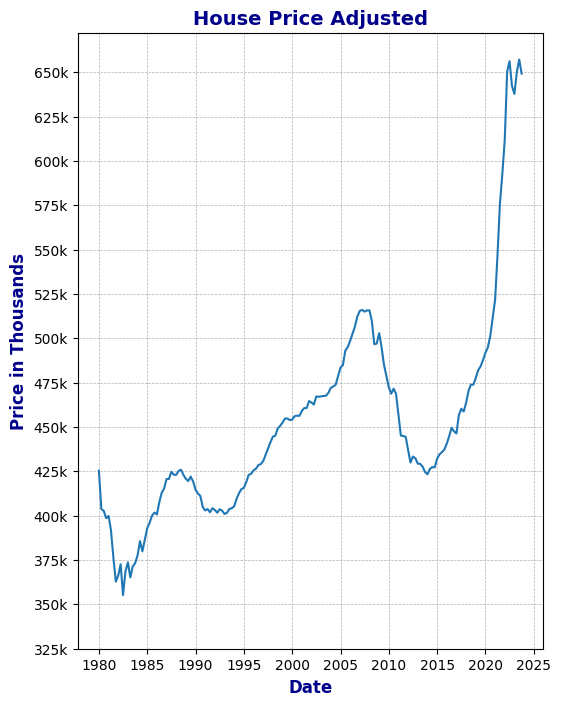

In [6]:
# Function to format y-axis labels with 'k' for thousands
def format_y(value, tick_position):
    return f'{value}k'

# Adjusting house prices for inflation
inflation_house = pd.merge(data_dict['house_df'], data_dict['house_cpi_df'], on='date')
inflation_house = inflation_house.drop(columns=['changed_x', 'changed_y'])
inflation_house.columns = ['date', 'price', 'cpi']
inflation_house['adjusted_price'] = (324.152/inflation_house['cpi']) * inflation_house['price']
inflation_house['changed'] = (inflation_house['adjusted_price'].pct_change() * 100).cumsum().fillna(0)

# Plotting the inflation-adjusted house prices
plt.figure(figsize=(6, 8))
plt.plot(inflation_house['date'], inflation_house['adjusted_price'])
plt.title("House Price Adjusted", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(325, 675, 25))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))
plt.savefig("graphs/house_price_adjusted.png")
plt.show()

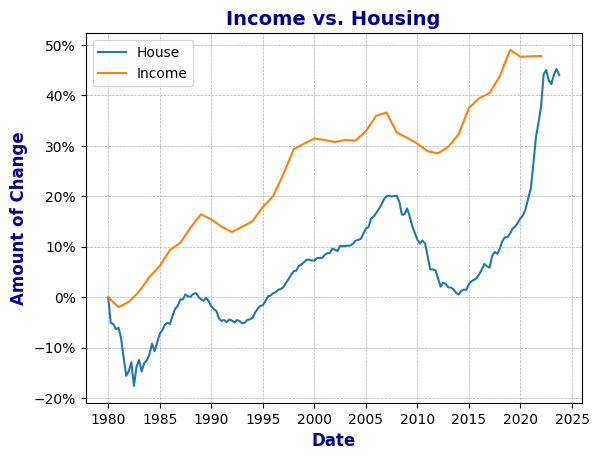

In [7]:
# Plotting the percentage change in house prices and income over time
plt.plot(inflation_house['date'], inflation_house['changed'], label="House")
plt.plot(data_dict['income_adjusted_df']['date'], data_dict['income_adjusted_df']['changed'], label="Income")

# Setting the title and labels for the plot
plt.title("Income vs. Housing", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Amount of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding a grid, legend, and formatting the y-axis as a percentage
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Saving the plot as an image and displaying it
plt.savefig("graphs/income_vs_housing.png")
plt.show()

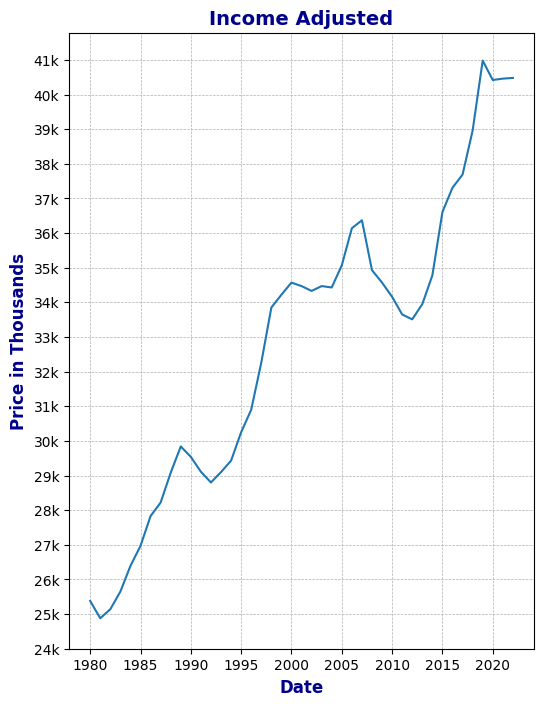

In [8]:
plt.figure(figsize=(6, 8))

# Plotting adjusted income values over time
plt.plot(data_dict['income_adjusted_df']['date'], data_dict['income_adjusted_df']['value']/1000)

# Setting the title and labels
plt.title("Income Adjusted", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing y-axis ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(24, 42, 1))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))

# Saving the plot and displaying it
plt.savefig("graphs/income_adjusted.png")
plt.show()

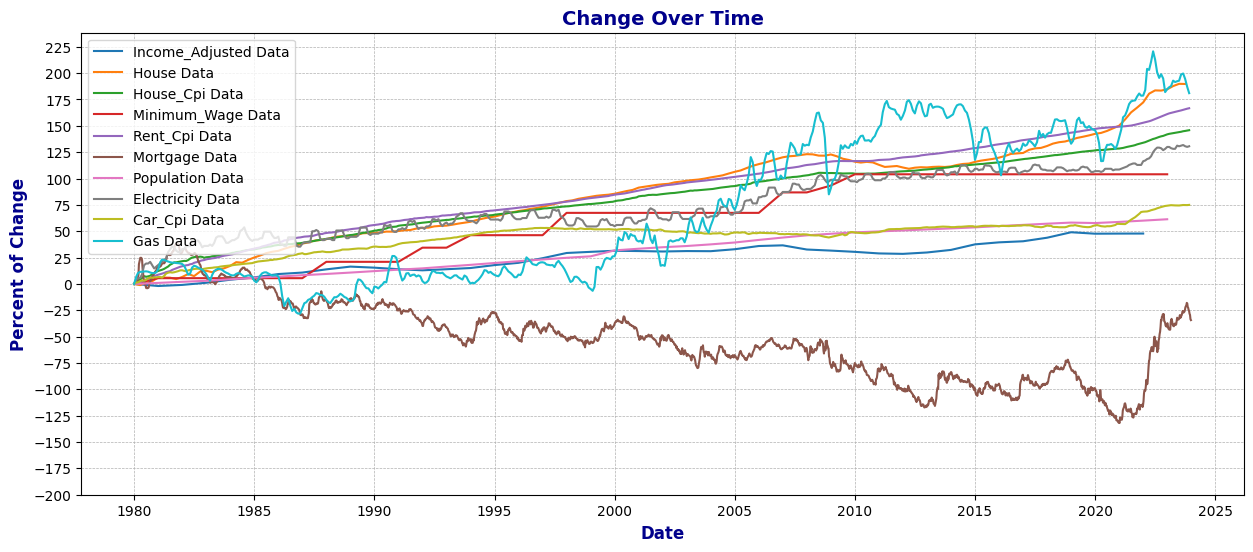

In [9]:
# Creating a visualization for income, house, and minimum wage data
plt.figure(figsize=(15, 6))

# Plotting the percentage change over time for each dataset in the dictionary
for key, value in data_dict.items():
    plt.plot(value['date'], value['changed'], label=f'{key.replace("_df", "").title()} Data')

# Setting the title and labels
plt.title("Change Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percent of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding a legend, custom y-ticks, and a grid
plt.legend()
plt.yticks(range(-200, 250, 25))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Saving the plot and displaying it
plt.savefig('graphs/change_over_time.png')
plt.show()

# Plot All of the Graphs

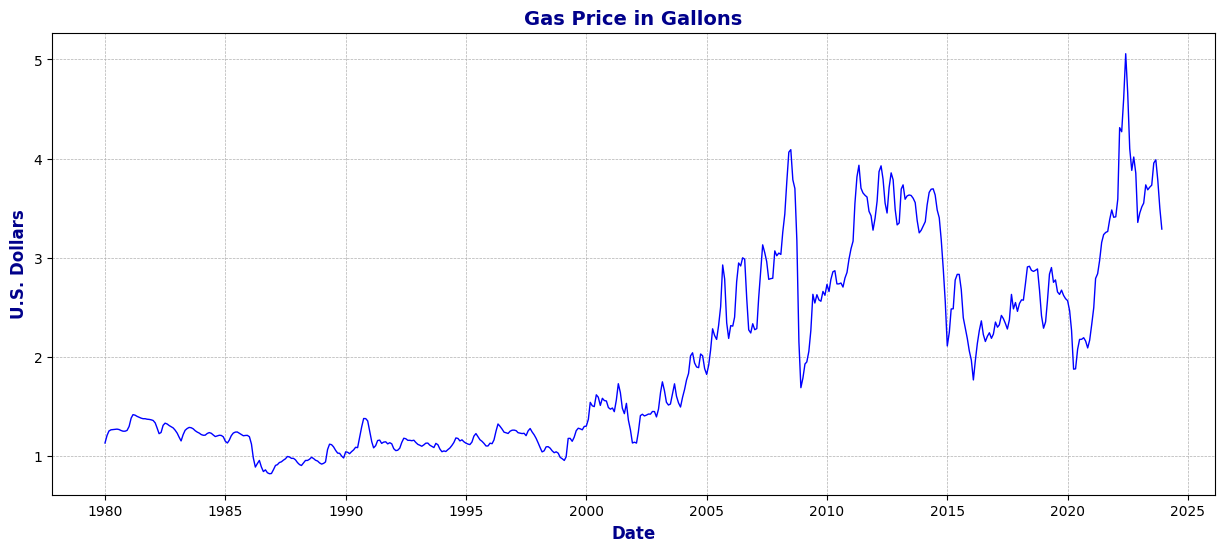

In [10]:
plt.figure(figsize=(15, 6))

# Plotting gas prices over time
plt.plot(data_dict['gas_df']['date'], data_dict['gas_df']['value'], linewidth=1, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Gas Price in Gallons", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("U.S. Dollars", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and saving the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('graphs/gas_price.png')
plt.show()

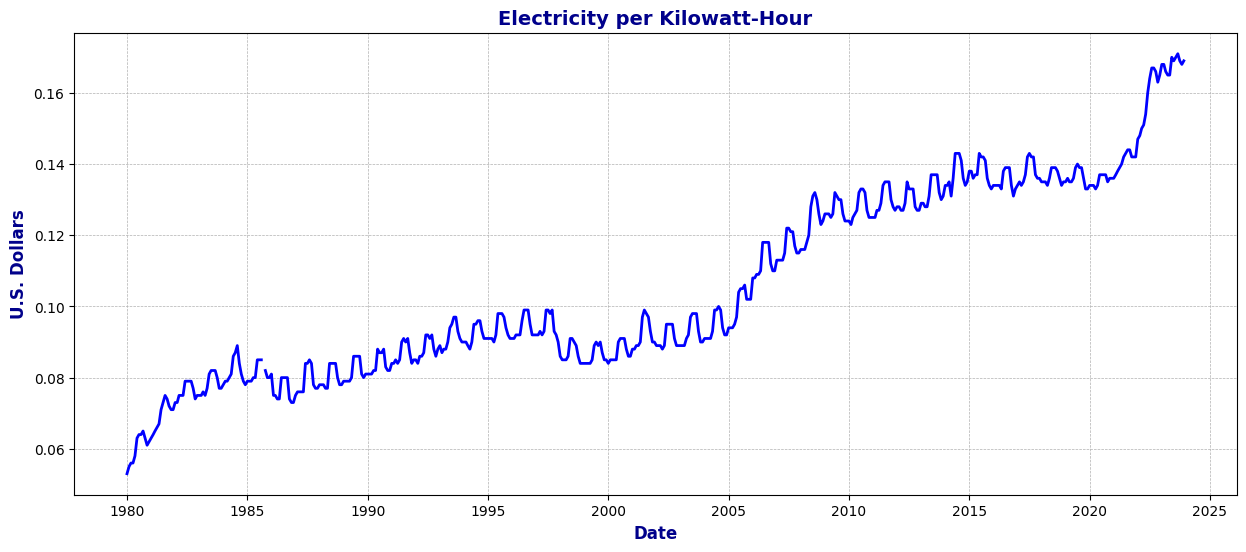

In [11]:
plt.figure(figsize=(15, 6))

# Plotting electricity prices over time
plt.plot(data_dict['electricity_df']['date'], data_dict['electricity_df']['value'], linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Electricity per Kilowatt-Hour", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("U.S. Dollars", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and saving the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('graphs/electricity_price.png')
plt.show()

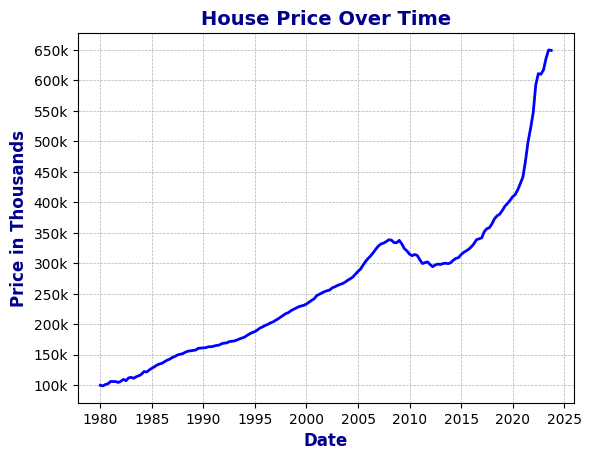

In [12]:
# Plotting house prices over time
plt.plot(data_dict['house_df']['date'], data_dict['house_df']['value'], linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("House Price Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Customizing y-axis ticks and formatting
plt.yticks(range(100, 700, 50))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))

# Adding grid lines and saving the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('graphs/house_price_over_time.png')
plt.show()

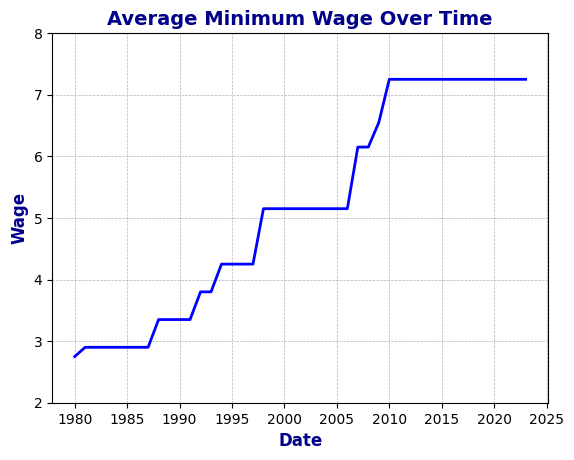

In [13]:
# Plotting average minimum wage over time
plt.plot(data_dict['minimum_wage_df']['date'], data_dict['minimum_wage_df']['value'], linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Average Minimum Wage Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Wage", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing y-axis ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(2, 9, 1))

# Saving the plot and displaying it
plt.savefig('graphs/min_wage_over_time.png')
plt.show()

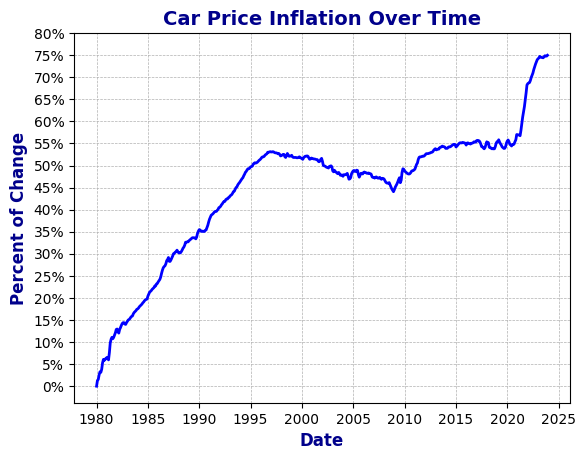

In [14]:
# Plotting CPI data for car prices over time
plt.plot(data_dict['car_cpi_df']['date'], data_dict['car_cpi_df']['changed'], linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Car Price Inflation Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percent of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing y-axis ticks and formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 85, 5))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Displaying the plot
plt.show()

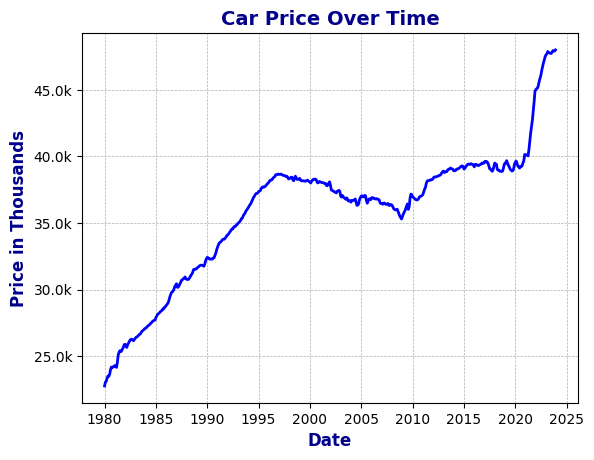

In [15]:
# Adjusting car CPI data to calculate estimated car prices
car_cpi = data_dict['car_cpi_df']
car_cpi['price'] = (car_cpi['value']/179.551) * 48000  # Calculate car price based on CPI

# Plotting the estimated car price over time
plt.plot(car_cpi['date'], car_cpi['price']/1000, linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Car Price Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and formatting the y-axis labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))

# Saving the plot and displaying it
plt.savefig('graphs/car_price.png')
plt.show()

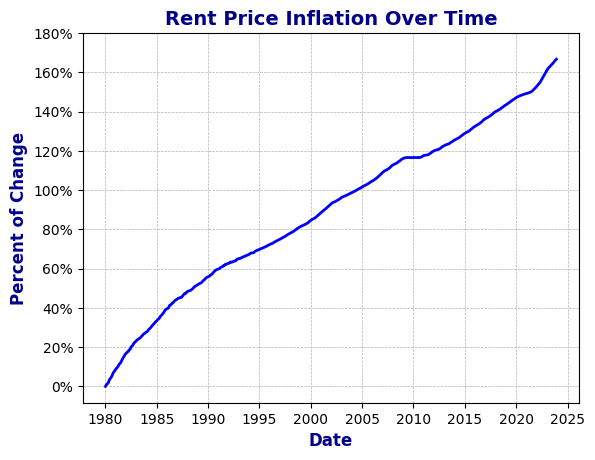

In [16]:
# Plotting CPI data for rent prices over time
plt.plot(data_dict['rent_cpi_df']['date'], data_dict['rent_cpi_df']['changed'], linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Rent Price Inflation Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percent of Change", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing y-axis ticks and formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 200, 20))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Displaying the plot
plt.show()

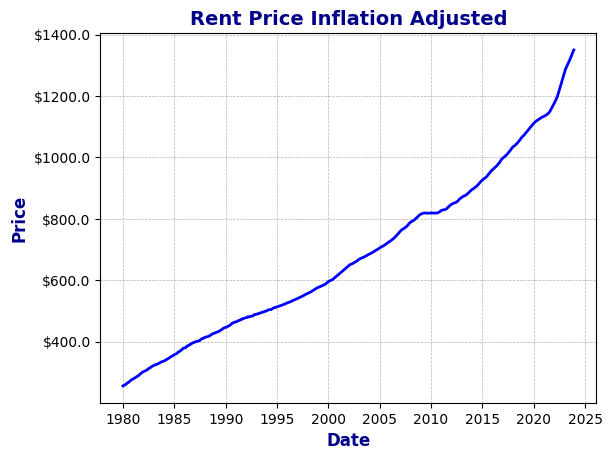

In [17]:
# Function to format y-axis labels as dollar amounts
def format_dollar(value, tick_position):
    return f'${value}'

# Adjusting rent CPI data to calculate estimated rent prices
rent_cpi = data_dict['rent_cpi_df']
rent_cpi['price'] = (rent_cpi['value']/410.606) * 1350  # Calculate rent price based on CPI

# Plotting the inflation-adjusted rent prices over time
plt.plot(rent_cpi['date'], rent_cpi['price'], linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Rent Price Inflation Adjusted", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and formatting the y-axis labels as dollars
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_dollar))

# Saving the plot and displaying it
plt.savefig('graphs/rent_price.png')
plt.show()

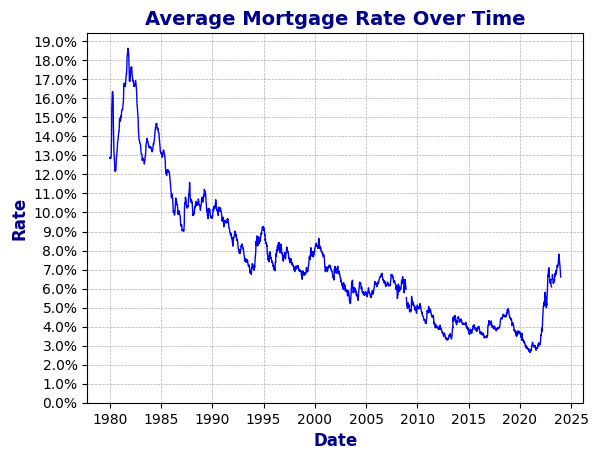

In [18]:
# Plotting the average mortgage rate over time
plt.plot(data_dict['mortgage_df']['date'], data_dict['mortgage_df']['value'], linewidth=1, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Average Mortgage Rate Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Rate", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing y-axis ticks and formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 20, 1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Saving the plot and displaying it
plt.savefig('graphs/mortgage_rate_over_time.png')
plt.show()

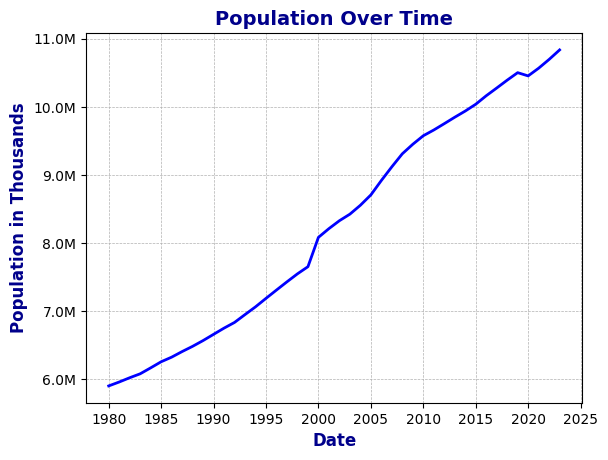

In [19]:
# Function to format y-axis labels as millions with one decimal place
def format_m(value, tick_position):
    return f"{value}.0M"

# Plotting population data over time
plt.plot(data_dict['population_df']['date'], data_dict['population_df']['value']/1000, linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Population Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Population in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing y-axis ticks and formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(6, 12, 1))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_m))

# Saving the plot and displaying it
plt.savefig('graphs/population_over_time.png')
plt.show()

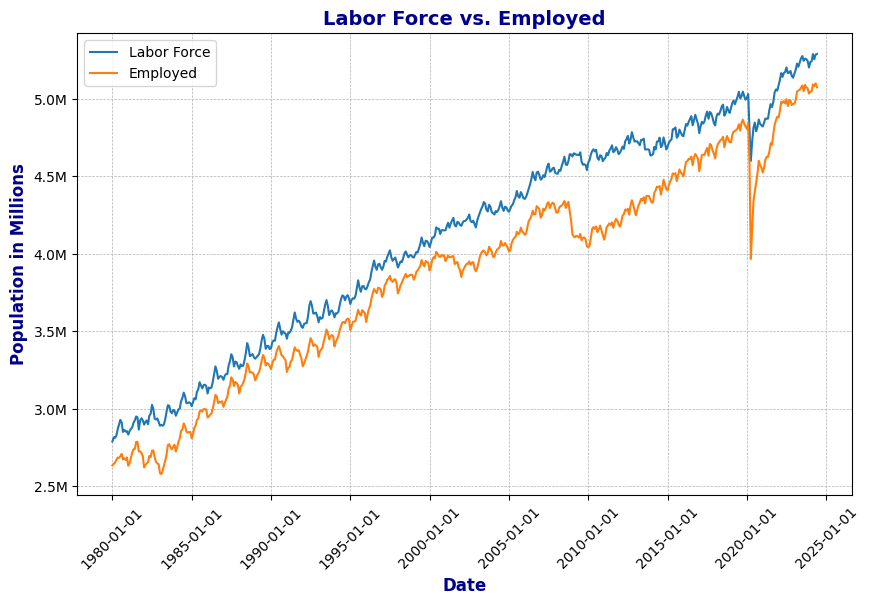

In [20]:
# Function to format y-axis labels as millions
def format_m(value, tick_position):
    return f"{value/1000000}M"

# Loading unemployment data and converting the 'Date' column to datetime format
unemployment = pd.read_csv("data/unemployment_rate.csv", index_col=0)
unemployment["Date"] = unemployment['Date'].astype("datetime64[ns]")

# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting Labor Force and Employed over time
plt.plot(unemployment['Date'], unemployment['Labor Force'], label="Labor Force")
plt.plot(unemployment['Date'], unemployment['Employed'], label="Employed")

# Setting the title and labels
plt.title("Labor Force vs. Employed", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Population in Millions", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and formatting the y-axis as millions
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_m))

# Customizing x-axis ticks for every 5 years, with labels rotated for readability
plt.xticks(pd.date_range(start=pd.Timestamp('1980-01-01'),
                         end=pd.Timestamp('2025-01-01'),
                         freq='5YS'), rotation=45)

# Adding a legend and saving the plot
plt.legend()
plt.savefig("graphs/labor_force_employed.png")
plt.show()

# House Price Affordability Index
- Goal: Create an index that tracks housing affordability over time.
- Graph Type: Composite Line Chart
- Description: Plot a line chart where you calculate an affordability index based on the ratio of income to house prices. You can overlay this with mortgage rates to see how they impact affordability.
- Use Case: This index will highlight periods where housing became more or less affordable relative to income.

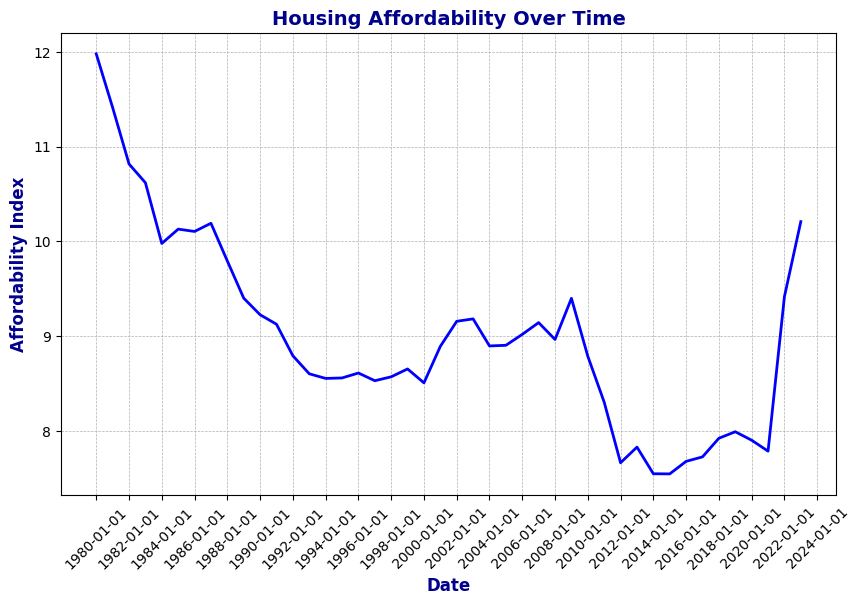

In [21]:
# Loading house and income data
house_df = pd.read_csv("data/house.csv", index_col=0)
income_df = pd.read_csv("data/income.csv", index_col=0)

# Merging house and income data on the 'date' column
house_income_df = pd.merge(house_df, income_df, on='date', suffixes=('_h', '_i'))

# Calculating housing affordability index
house_income_df['affordability'] = house_income_df['value_h'] / house_income_df['value_i']

# Converting the 'date' column to datetime format
house_income_df['date'] = house_income_df['date'].astype("datetime64[ns]")

# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting the housing affordability index over time
plt.plot(house_income_df['date'], house_income_df['affordability'] * 1000, linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Housing Affordability Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Affordability Index", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing x-axis ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(pd.date_range(start=pd.Timestamp('1980-01-01'),
                         end=pd.Timestamp('2025-01-01'),
                         freq='2YS'), rotation=45)

# Saving the plot and displaying it
plt.savefig("graphs/housing_affordabilty.png")
plt.show()

In [22]:
def conversion_date_value_2(df):
    """Convert the columns 'date' to datetime and 'value' to float"""
    conversions = {
        'date': 'datetime64[ns]',
        'value': float
    }

    # Convert 'value' column to numeric, coercing errors to NaN, then apply the conversions
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df.astype(conversions)

    return df

# Preparing affordability data
affordability = house_income_df[['date', 'affordability']]
affordability.columns = ['date', 'value']
affordability = conversion_date_value_2(affordability)

# Preparing mortgage data
mortgage = conversion_date_value_2(data_dict['mortgage_df'][['date', 'value']])
mortgage['year'] = mortgage['date'].dt.year
affordability['year'] = affordability['date'].dt.year

# Averaging mortgage data by year and merging with affordability data
mortgage_year = mortgage.groupby('year').mean().reset_index()
combined_df = pd.merge(mortgage, affordability, on="year")

# Cleaning up the combined DataFrame
combined_df = combined_df.drop(columns=(['date_x', 'date_y']))
combined_df.columns = ['mortgage rate', 'year', 'affordability']

# Displaying the first few rows of the combined DataFrame
combined_df.head()

/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_18589/265270028.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = pd.to_numeric(df['value'], errors='coerce')
/var/folders/kh/3tw2vndj0gj3w6nlrv1mggtc0000gn/T/ipykernel_18589/265270028.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = pd.to_numeric(df['value'], errors='coerce')


,mortgage rate,year,affordability
0,12.85,1980,0.011976
1,12.90,1980,0.011976
2,12.87,1980,0.011976
3,12.89,1980,0.011976
4,12.85,1980,0.011976


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

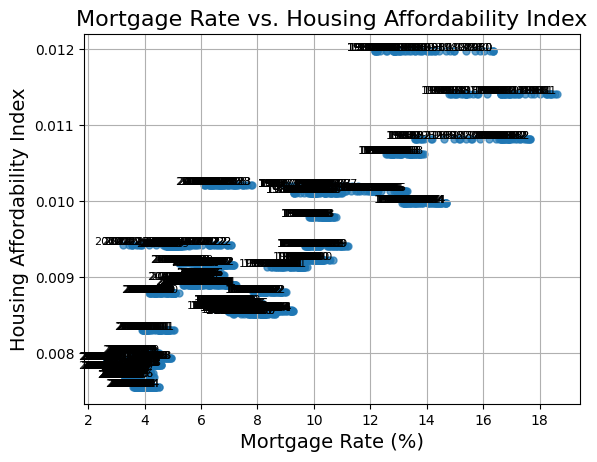

In [23]:
# Creating a scatter plot for mortgage rate vs. housing affordability
plt.scatter(combined_df['mortgage rate'], combined_df['affordability'], s=25, alpha=0.7)

# Annotating each point with the corresponding year
for i in range(len(combined_df)):
    plt.text(combined_df['mortgage rate'][i], combined_df['affordability'][i], combined_df['year'][i], fontsize=8, ha='right')

# Setting the title and labels
plt.title('Mortgage Rate vs. Housing Affordability Index', fontsize=16)
plt.xlabel('Mortgage Rate (%)', fontsize=14)
plt.ylabel('Housing Affordability Index', fontsize=14)

# Adding a grid and displaying the plot
plt.grid(True)
plt.savefig('graphs/mortgage_housing_scatter.png')
plt.show()

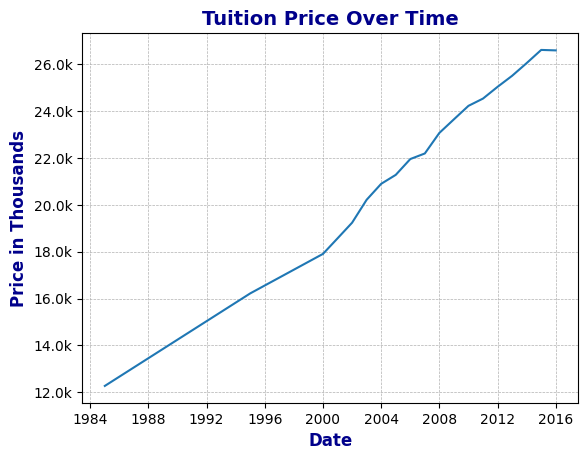

In [24]:
# Loading datasets
population_csv = pd.read_csv("data/population.csv")
mortgage_csv = pd.read_csv("data/mortgage.csv")
cpi_csv = pd.read_csv("data/cpi.csv", index_col=0)
minimum_wage_csv = pd.read_csv("data/minimum_wage.csv")
historical_tuition_csv = pd.read_csv("data/historical_tuition.csv")

# Preparing historical tuition data
historical_tuition_csv['year'] = pd.to_datetime(historical_tuition_csv['year'].str[:4], format='%Y')
historical_tuition_csv = historical_tuition_csv.loc[(historical_tuition_csv['tuition_type'] == "4 Year Constant") &
                                                    (historical_tuition_csv['type'] == "All Institutions")].reset_index(drop=True)
historical_tuition_csv.drop(columns=['tuition_type', 'type'], inplace=True)

# Plotting tuition price over time
plt.plot(historical_tuition_csv['year'], historical_tuition_csv['tuition_cost']/1000)

# Setting the title and labels
plt.title("Tuition Price Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Price in Thousands", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Formatting y-axis labels and adding grid
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Saving the plot and displaying it
plt.savefig("graphs/tuition_price_over_time.png")
plt.show()

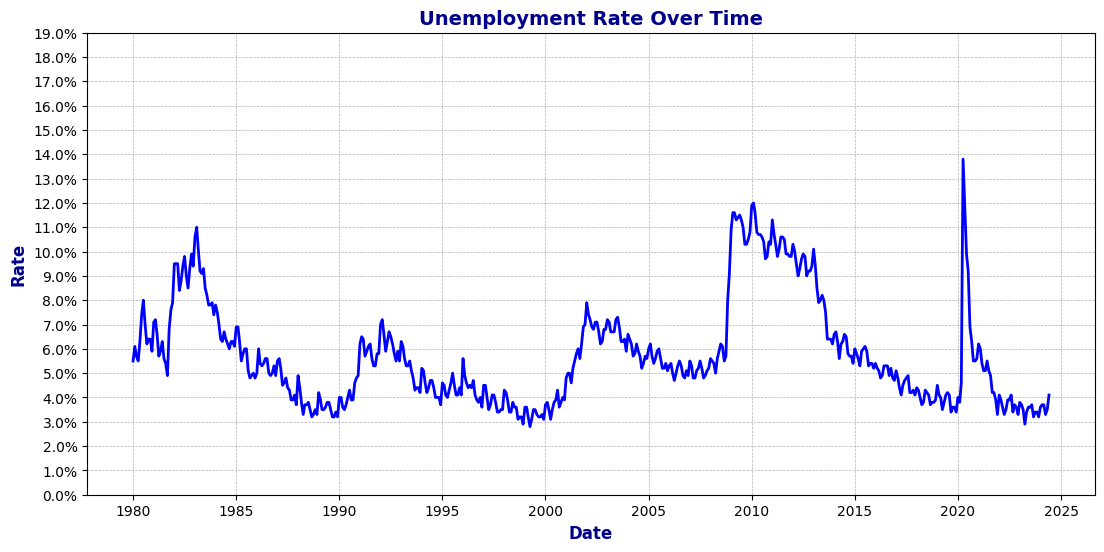

In [25]:
# Setting up the figure size for the plot
plt.figure(figsize=(13, 6))

# Plotting the unemployment rate over time
plt.plot(unemployment['Date'], unemployment['Unemployment Rate(%)'], linewidth=2, linestyle='-', color='blue')

# Setting the title and labels
plt.title("Unemployment Rate Over Time", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Rate", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Date", fontsize=12, fontweight='bold', color='darkblue')

# Adding grid lines and customizing y-axis ticks and formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(range(0, 20, 1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Saving the plot and displaying it
plt.savefig("graphs/unemployment_rate_over_time.png")
plt.show()

In [26]:
# Creating a dictionary with start and end values for various economic indicators
start_end_data = {
    "income": [8350, 60484],
    "house": [100000, 649300],
    "electricity": [0.053, 0.169],
    "gas": [1.131, 3.289],
    "car": [7574, 48000],
    "rent": [255, 1350],
    "min_wage": [2.75, 7.25],
    "population": [5.9, 10.8]
}

# Converting the dictionary into a DataFrame and calculating percentage change from 1980 to 2023
df = pd.DataFrame(start_end_data)
df = df.transpose()  # Transpose to have indicators as rows
df.columns = [1980, 2023]  # Set the columns as the years
df['change'] = (df[2023] - df[1980]) / df[1980] * 100  # Calculate the percentage change

# Creating a similar DataFrame with adjusted start values for inflation or other adjustments
adjusted_start_end_data = {
    "income": [21020, 60484],
    "house": [100000, 649300],
    "electricity": [0.053, 0.169],
    "gas": [1.131, 3.289],
    "car": [28000, 48000],
    "rent": [255, 1350],
    "min_wage": [2.75, 7.25],
    "population": [5.9, 10.8]
}

# Converting the adjusted data into a DataFrame and calculating percentage change
adjusted_df = pd.DataFrame(adjusted_start_end_data)
adjusted_df = adjusted_df.transpose()  # Transpose to have indicators as rows
adjusted_df.columns = [1980, 2023]  # Set the columns as the years
adjusted_df['change'] = (adjusted_df[2023] - adjusted_df[1980]) / adjusted_df[1980] * 100  # Calculate the percentage change

# Display the adjusted DataFrame
adjusted_df

,1980,2023,change
income,21020.000,60484.000,187.745005
house,100000.000,649300.000,549.300000
electricity,0.053,0.169,218.867925
gas,1.131,3.289,190.804598
car,28000.000,48000.000,71.428571
rent,255.000,1350.000,429.411765
min_wage,2.750,7.250,163.636364
population,5.900,10.800,83.050847


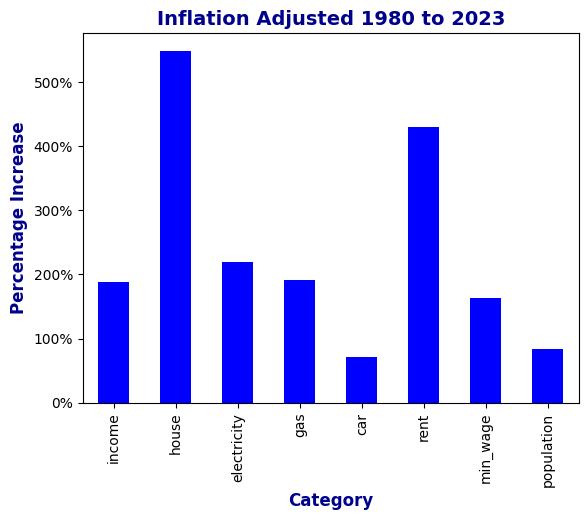

In [27]:
# Plotting the percentage change for inflation-adjusted data as a bar chart
adjusted_df['change'].plot(kind='bar', color='blue')

# Setting the title and labels
plt.title("Inflation Adjusted 1980 to 2023", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percentage Increase", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Category", fontsize=12, fontweight='bold', color='darkblue')

# Formatting y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Displaying the plot
plt.show()

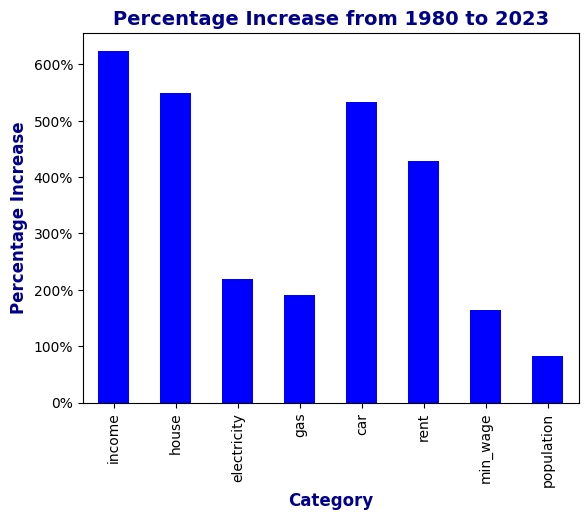

In [28]:
# Plotting the percentage change from 1980 to 2023 as a bar chart
df['change'].plot(kind='bar', color='blue')

# Setting the title and labels
plt.title("Percentage Increase from 1980 to 2023", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Percentage Increase", fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("Category", fontsize=12, fontweight='bold', color='darkblue')

# Formatting y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Displaying the plot
plt.show()